In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [2]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
# check if the dataset contain null value or not?

data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# Exploring transaction type.

data.duplicated().value_counts()


False    6362620
dtype: int64

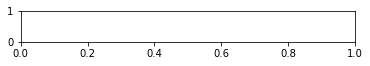

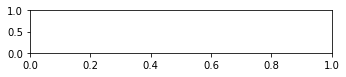

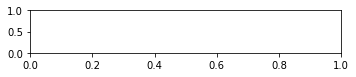

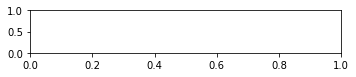

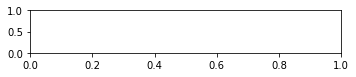

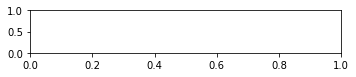

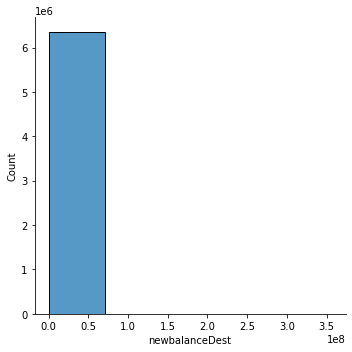

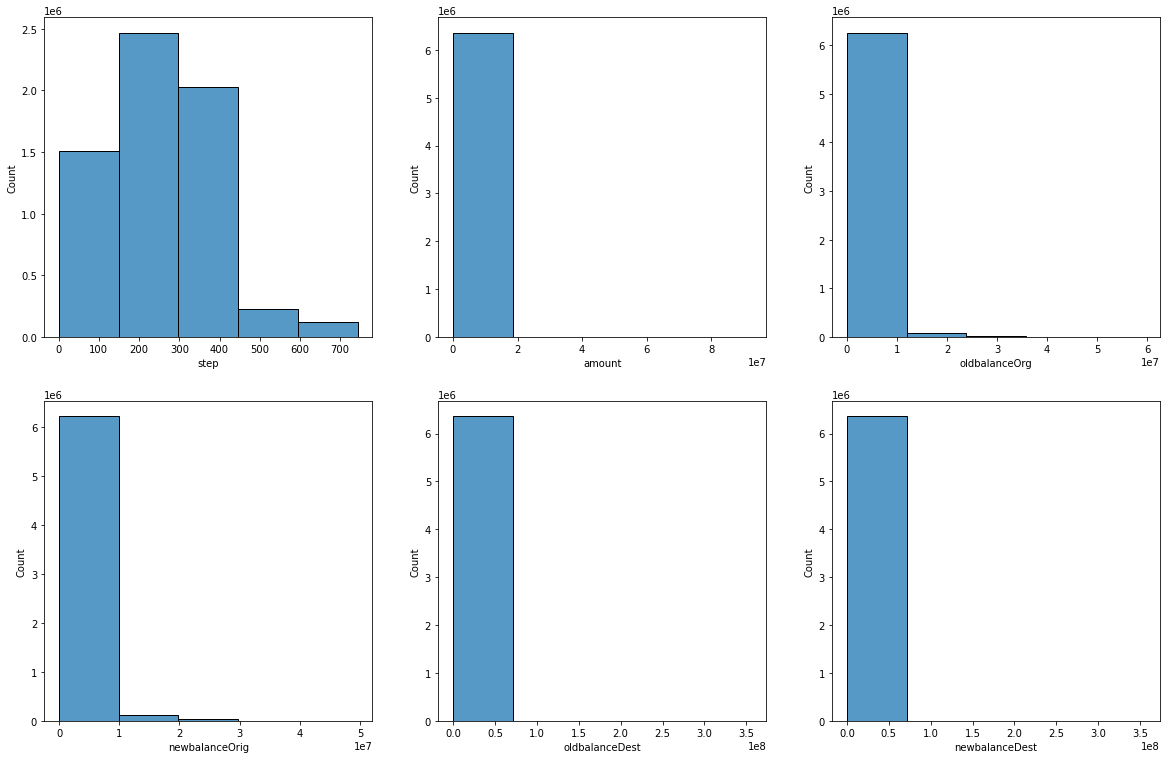

In [7]:
feature1=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature1):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data[i[1]],bins=5)


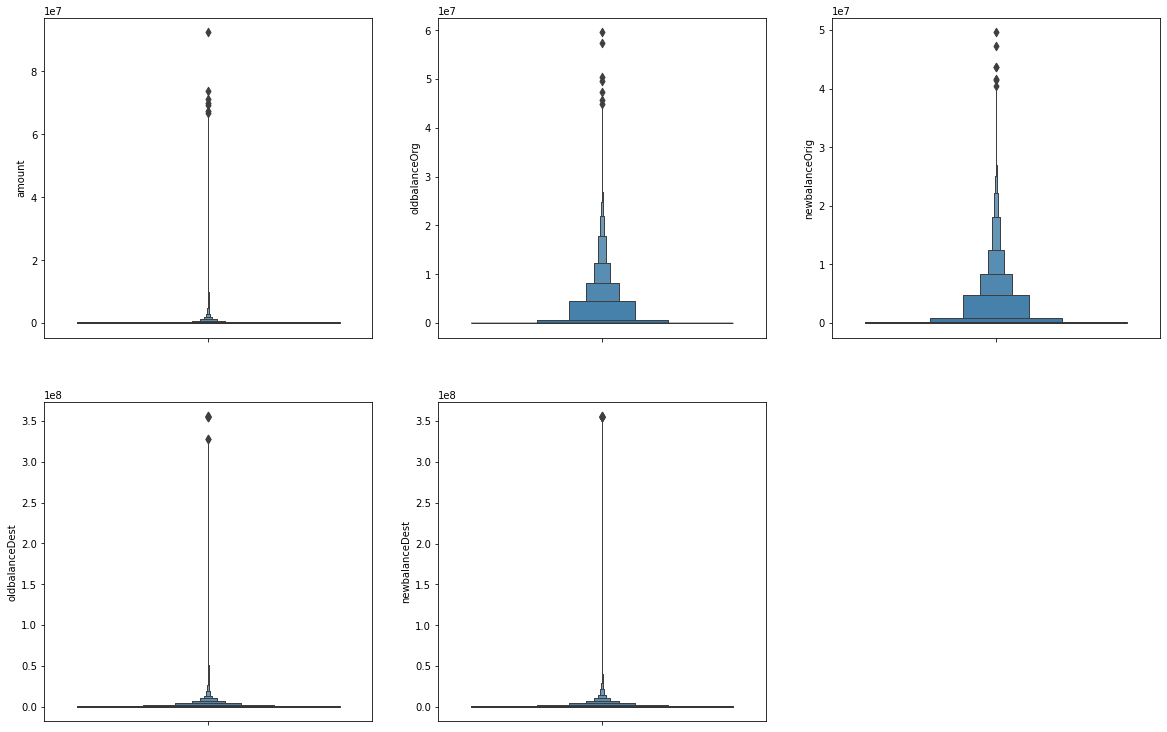

In [11]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxenplot(y=data[i[1]])

In [12]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




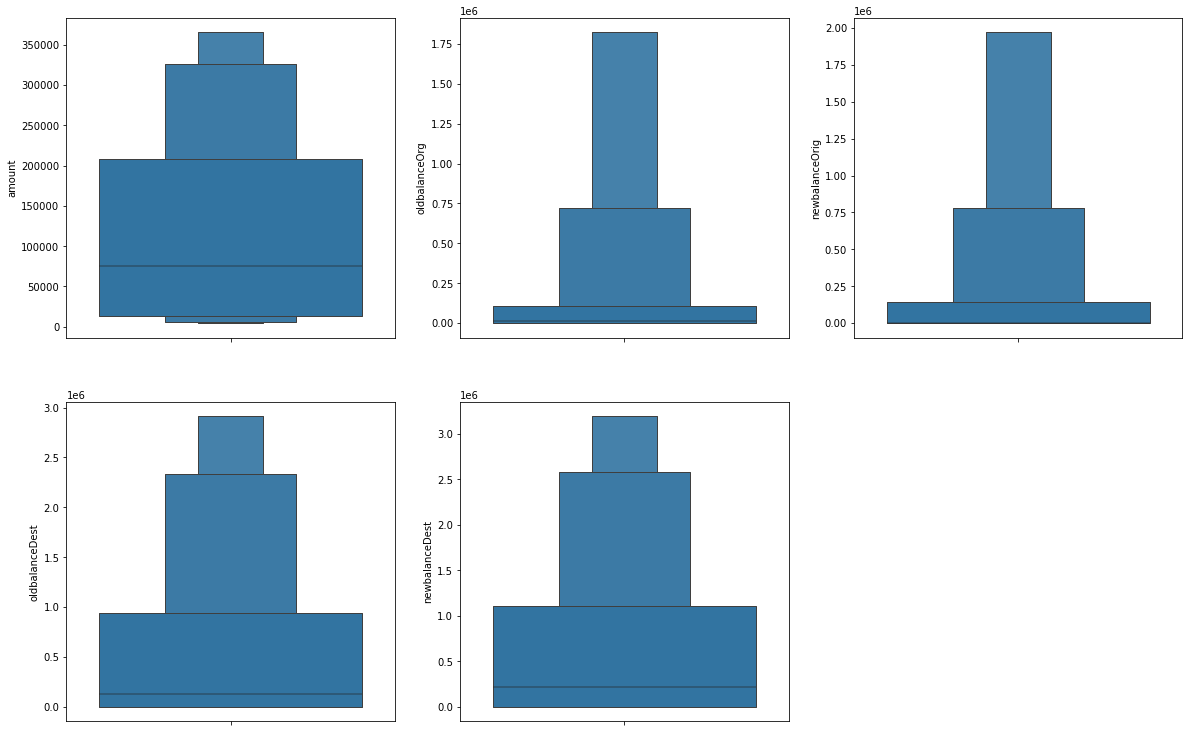

In [13]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxenplot(y=data[i[1]])

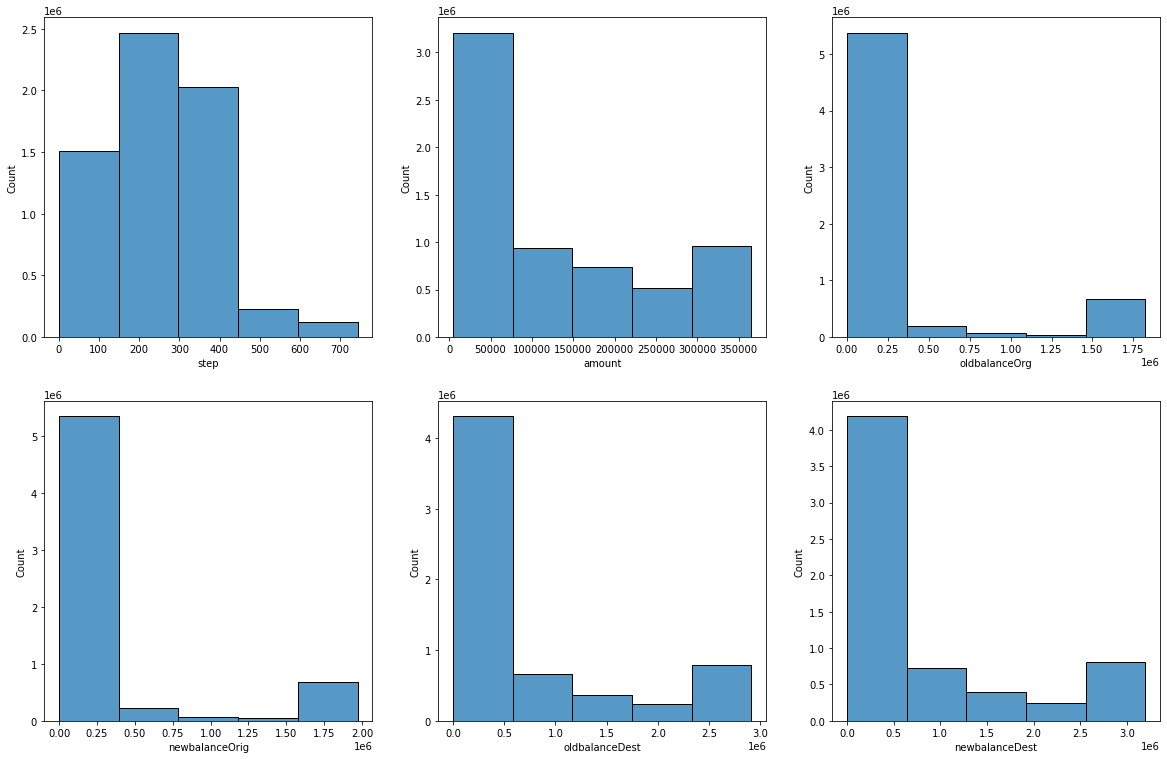

In [14]:
feature1=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature1):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data[i[1]],bins=5)


In [15]:
CrosstabResult=pd.crosstab(index=data.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

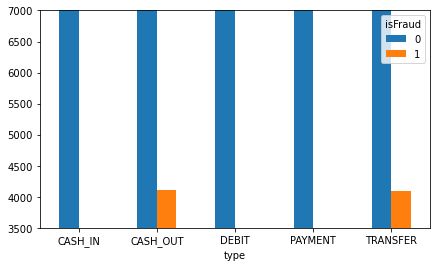

In [16]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<AxesSubplot:>

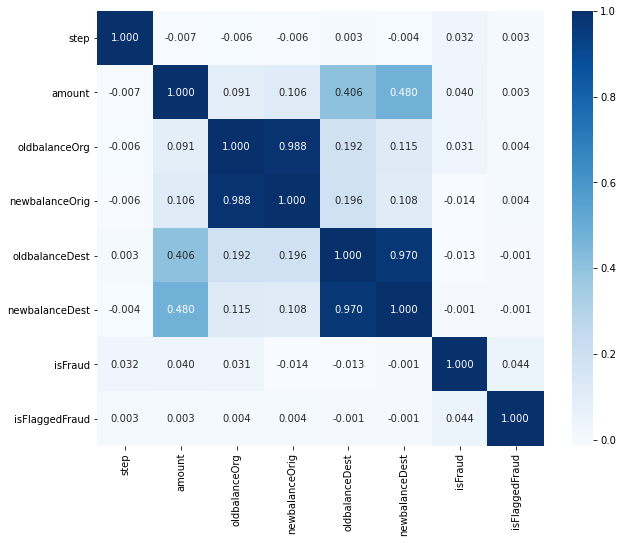

In [17]:
# calculate correlation matrix
plt.figure(figsize=(10,8))

corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

In [19]:
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   4501.30  C1666544295        21249.0        19384.72   
2     1     4   4501.30  C1305486145          181.0            0.00   
3     1     1   4501.30   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [22]:
# splitting the data

x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])



In [31]:
# training a machine learning model

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)





In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))


In [29]:

# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(model.predict(features))


['Fraud']


In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

SvcModel  = SVC()


param={'Svc' : {
        'C':[0.1,1,100],
        'kernel':['rbf','poly','sigmoid'],
        'degree':[1,2,3,4,5,6]
      },
      "Logistic Regression" : {
          'penalty': ['l1', 'l2', 'elasticnet'],
                'C': np.logspace(-4, 4, 20),
                'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
                'max_iter': [100, 1000, 2500, 5000]
               }
      
      }

models = {
    "Svc": SVC(),
    "Logistic Regression" : LogisticRegression()
}

    
report = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

    para = param[list(models.keys())[i]]

    gs = GridSearchCV(model, para, cv=3)
    gs.fit(X_train, y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(y_train, X_train_prediction)
    print("training_data_accuracy = ",training_data_accuracy)
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(y_test, X_test_prediction)
    print("test_data_accuracy = ",test_data_accuracy)
    precision_train = precision_score(y_train, X_train_prediction)
    print('Training data Precision = ', precision_train)
    precision_test = precision_score(y_test, X_test_prediction)
    print('Test data Precision = ', precision_test)
    recall_train = recall_score(y_train, X_train_prediction)
    print('Training data Recall = ', recall_train)
    recall_test = recall_score(y_test, X_test_prediction)
    print('Test data Recall = ', recall_test)
    report[list(models.keys())[i]] = precision_test

    
print(report)

SVC()
